In [1]:
import numpy as np
from scipy import misc  
from PIL import Image  
import glob  
import matplotlib.pyplot as plt  
import scipy.misc  
from matplotlib.pyplot import imshow  
%matplotlib inline
from IPython.display import SVG  
import cv2  
import seaborn as sn  
import pandas as pd  
import pickle  
from keras import layers  
from keras.layers import Flatten, Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout  
from keras.models import Sequential, Model, load_model  
from keras.preprocessing import image  
from keras.preprocessing.image import load_img  
from keras.preprocessing.image import img_to_array  
from keras.applications.imagenet_utils import decode_predictions  
from keras.utils import layer_utils, np_utils  
from keras.utils.data_utils import get_file  
from keras.applications.imagenet_utils import preprocess_input  
from keras.utils.vis_utils import model_to_dot  
from keras.utils import plot_model  
from keras.initializers import glorot_uniform  
from keras import losses  
import keras.backend as K  
from keras.callbacks import ModelCheckpoint  
from sklearn.metrics import confusion_matrix, classification_report  
import tensorflow as tf  

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar100
(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')

In [3]:
print(y_train_original)

[[19]
 [29]
 [ 0]
 ...
 [ 3]
 [ 7]
 [73]]


In [4]:
#One Hot Encoding de las Categorias en Y_train_Original
y_train = np_utils.to_categorical(y_train_original, 100)
y_test = np_utils.to_categorical(y_test_original, 100)

In [5]:
print(x_train_original.shape)

(50000, 32, 32, 3)


<function matplotlib.pyplot.show(*args, **kw)>

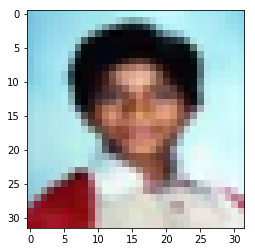

In [6]:
#x_train_original[3] ---> dentro de la matriz, se esta escogiendo la posición [3] donde corresponde al arreglo de imagenes
imgplot = plt.imshow(x_train_original[3])
plt.show

In [7]:
#Se normaliza las imagenes por el número de pixeles (255)
x_train = x_train_original/255
x_test = x_test_original/255

In [8]:
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

# CREAR RED NEURONAL

In [9]:
def create_simple_nn():  
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3), name="Input_layer"))
    model.add(Dense(1000, activation='relu', name="Hidden_layer_1"))
    model.add(Dense(500, activation='relu', name="Hidden_layer_2"))
    model.add(Dense(100, activation='softmax', name="Output_layer"))

    return model

In [10]:
snn_model = create_simple_nn()
snn_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc','mse'])

#Optimización: descenso de gradiente estocástico (sgd)
#función de perdida: Entropia Cruzada
#Prección (Tasa de Acierto): accuracy
#Medidor de Errores Cuadraticos: MSE

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
snn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Flatten)        (None, 3072)              0         
_________________________________________________________________
Hidden_layer_1 (Dense)       (None, 1000)              3073000   
_________________________________________________________________
Hidden_layer_2 (Dense)       (None, 500)               500500    
_________________________________________________________________
Output_layer (Dense)         (None, 100)               50100     
Total params: 3,623,600
Trainable params: 3,623,600
Non-trainable params: 0
_________________________________________________________________


In [12]:
snn = snn_model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_test, y_test), shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 34s 688us/step - loss: 4.1700 - acc: 0.0746 - mean_squared_error: 0.0097 - val_loss: 3.9157 - val_acc: 0.1087 - val_mean_squared_error: 0.0096
Epoch 2/10
50000/50000 [==============================] - 11s 217us/step - loss: 3.7856 - acc: 0.1289 - mean_squared_error: 0.0095 - val_loss: 3.7456 - val_acc: 0.1416 - val_mean_squared_error: 0.0094
Epoch 3/10
50000/50000 [==============================] - 11s 217us/step - loss: 3.6307 - acc: 0.1581 - mean_squared_error: 0.0093 - val_loss: 3.6432 - val_acc: 0.1516 - val_mean_squared_error: 0.0093
Epoch 4/10
50000/50000 [==============================] - 12s 231us/step - loss: 3.5268 - acc: 0.1767 - mean_squared_error: 0.0092 - val_loss: 3.6164 - val_acc: 0.1584 - val_mean_squared_error: 0.0093
Epoch 5/10
50000/50000 [==============================] - 13s 254us/step - loss: 3.4456 - acc: 0.1

In [13]:
evaluation = snn_model.evaluate(x=x_test, y=y_test, batch_size=32, verbose=1)
evaluation
#Evaluar con datos de prueba en caso que no se haga en el entrenamiento

10000/10000 [==============================] - 1s 70us/step


[3.369387172698975, 0.2137, 0.00894149347692728]

<function matplotlib.pyplot.show(*args, **kw)>

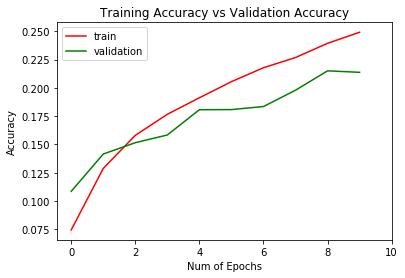

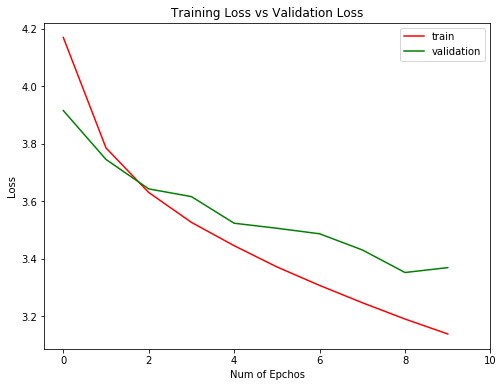

In [14]:
plt.figure(0)
plt.plot(snn.history['acc'],'r')
plt.plot(snn.history['val_acc'],'g')
plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8,6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train', 'validation'])

plt.figure(1)
plt.plot(snn.history['loss'],'r')
plt.plot(snn.history['val_loss'],'g')
plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8,6)
plt.xlabel("Num of Epchos")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.show

## Matriz de Confusión (Scikit Learn)

In [15]:
snn_pred = snn_model.predict(x_test, batch_size=32, verbose=1)
snn_predicted = np.argmax(snn_pred, axis=1)

10000/10000 [==============================] - 1s 56us/step


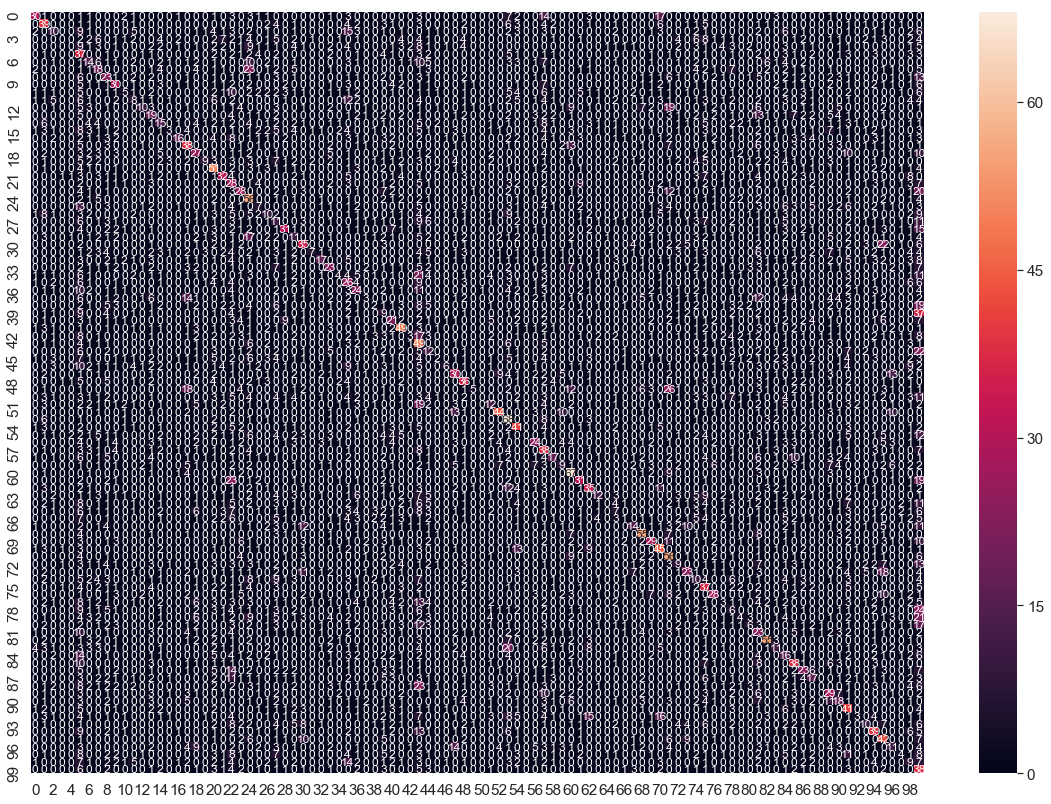

In [16]:
#Creamos la matriz de confusión
snn_cm = confusion_matrix(np.argmax(y_test, axis=1), snn_predicted)

# Visualizamos la matriz de confusión
snn_df_cm = pd.DataFrame(snn_cm, range(100), range(100))  
plt.figure(figsize = (20,14))  
sn.set(font_scale=1.4) #for label size  
sn.heatmap(snn_df_cm, annot=True, annot_kws={"size": 12}) # font size  
plt.show()  

In [17]:
snn_report = classification_report(np.argmax(y_test, axis=1), snn_predicted)
print(snn_report)

              precision    recall  f1-score   support

           0       0.57      0.30      0.39       100
           1       0.30      0.39      0.34       100
           2       0.20      0.10      0.13       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100
           5       0.08      0.37      0.13       100
           6       0.16      0.14      0.15       100
           7       0.17      0.18      0.18       100
           8       0.17      0.23      0.20       100
           9       0.29      0.30      0.30       100
          10       0.21      0.05      0.08       100
          11       0.16      0.08      0.11       100
          12       0.45      0.10      0.16       100
          13       0.18      0.19      0.18       100
          14       0.19      0.15      0.17       100
          15       0.21      0.03      0.05       100
          16       0.55      0.16      0.25       100
          17       0.28    

## Curva ROC (Tase de Verdaderos Positivos y Falsos Positivos)

In [18]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

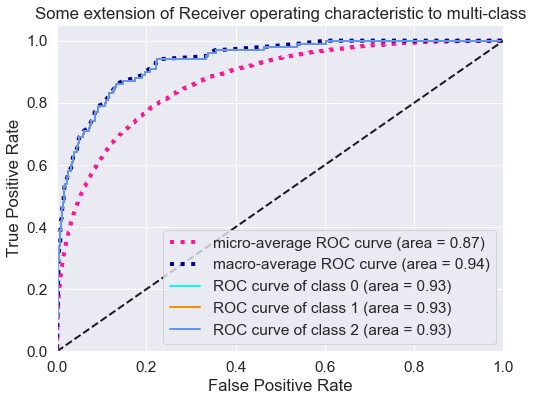

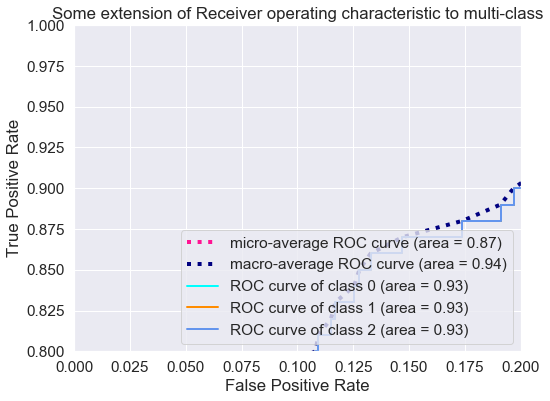

In [19]:
n_classes = 100
from sklearn.metrics import roc_curve, auc

#Plot Linewidth
lw = 2

#Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,1], snn_pred[:,1])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), snn_pred.ravel())  
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)  
for i in range(n_classes):  
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr  
tpr["macro"] = mean_tpr  
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)  
plt.plot(fpr["micro"], tpr["micro"],  
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],  
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])  
for i, color in zip(range(n_classes-97), colors):  
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Some extension of Receiver operating characteristic to multi-class')  
plt.legend(loc="lower right")  
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)  
plt.xlim(0, 0.2)  
plt.ylim(0.8, 1)  
plt.plot(fpr["micro"], tpr["micro"],  
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],  
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])  
for i, color in zip(range(3), colors):  
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Some extension of Receiver operating characteristic to multi-class')  
plt.legend(loc="lower right")  
plt.show()

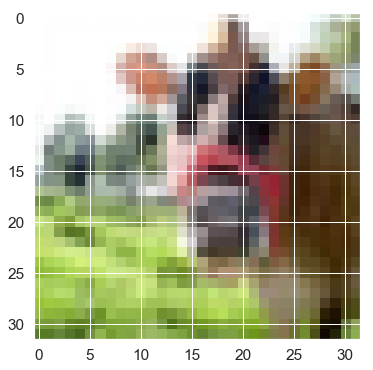

Class for Image 3:  49
Predicted:          71


In [20]:
#Detalles

imgplot = plt.imshow(x_train_original[0])
plt.show()
print('Class for Image 3:  '+ str(np.argmax(y_test[0])))
print('Predicted:          '+ str(snn_predicted[0]))

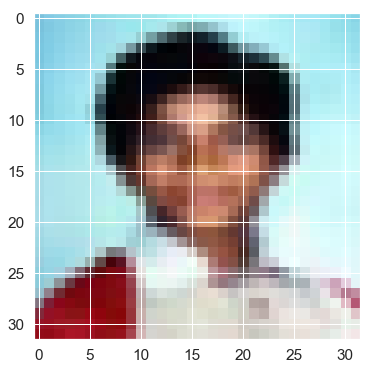

Class for Image 3:  51
Predicted:          57


In [21]:
#Detalles

imgplot = plt.imshow(x_train_original[3])
plt.show()
print('Class for Image 3:  '+ str(np.argmax(y_test[3])))
print('Predicted:          '+ str(snn_predicted[3]))

In [22]:
#Histórico
with open('simplenn_history.txt', 'wb') as file_pi:  
  pickle.dump(snn.history, file_pi)